In [60]:
import numpy as np
import pandas as pd
class NN:
    def __init__(self,etha,epoch,rand_state=1) -> None:
        self.etha = etha
        self.rand_state = rand_state
        self.epoch = epoch
    
    def activation(self,x,param):
        match param:
            case "linear":
                return self.linear(x)
            case "binstep":
                return self.binstep(x)
            case "sigmoid":
                return self.sigmoid(x)
            case "tanh":
                return self.tanh(x)
            case "ReLU":
                return self.ReLU(x)
            case "softplus":
                return self.softplus(x)
            case "silu":
                return self.silu(x)
            case "gaussian":
                return self.gaussian(x)
            case _:
                raise Exception("invalid activation function") 

    def fit(self,x,y,norm=False):
        if norm:
            x = self.normalize(x)
        fixed_prob = np.random.RandomState(self.rand_state)
        self.w = fixed_prob.normal(loc=0,scale= 0.1,size=x.shape[1])
        self.b = 1
        self.costs = []
        for _ in range(self.epoch):
            shuffled_index = np.random.permutation(x.index)
            x = x.reindex(shuffled_index)
            y = y.reindex(shuffled_index)
            error = y-self.predict(x)
            self.w += self.etha*pd.Series(np.matmul(x.T, error))
            self.b += self.etha*error.sum()
            cost = (error**2).sum() / 2.0
            self.costs.append(cost)
    def linear(x):
        return x
    def binstep(x):
        return np.where(x>=0,1,0)
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    def tanh(x):
        return np.tanh(x)
    def ReLU(x):
        return np.maximum(0,x)
    def softplus(x):
        return np.ln(1+np.exp(x))
    def silu(x):
        return x/(1+np.exp(-x))
    def gaussian(x):
        return np.exp(-x**2)

    def net_input(self,x):
        return np.dot(x,self.w)+ self.b
    def predict(self,x,decimal_number=2):
        return self.net_input(x)

    def normalize(x):
        return (x-np.mean(x))/np.std(x)


In [77]:
import pandas as pd
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
# select setosa and versicolor

df.iloc[0:100, 4] = np.where(df.iloc[0:100, 4] == 'Iris-setosa', -1.0, 1.0)
y = df.iloc[0:100, 4]
# extract info
x = df.iloc[0:100,:4]
ppn = NN(etha=0.1, epoch=20)
ppn.fit(x, y)
ppn.predict(x.iloc[51])

1.6982602571951066e+54

In [113]:
x = np.array([1,2,3,-4,-0.2,0,12])
y = np.array([[7,-2],[4,6],[7,9],[-1,0],[1,1],[9,-1],[.5,-12]])
def normalize(x):
    return (x-np.mean(x))/np.std(x)
a = normalize(y)
inds = np.random.permutation(df.index)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [54]:
error = np.ones(x.shape[0])
np.dot(error,x)
np.matmul(error, x)
pd.Series(np.matmul(x.T, error))

0    547.1
1    309.4
2    286.2
3     78.5
dtype: float64

(3.418, 0.38102439795469095)

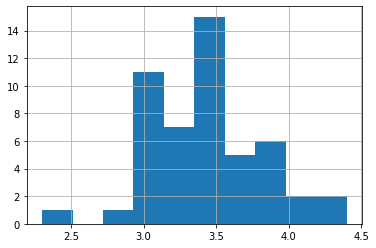

In [200]:
x = df.iloc[:50,1]
m = x.mean()
s = x.std()
x.hist()
m,s

In [217]:
for _ in range(3):
    shuffled_index = np.random.permutation(df.index)
    print(df.reindex(shuffled_index).head(10))

       0    1    2    3                4
122  7.7  2.8  6.7  2.0   Iris-virginica
75   6.6  3.0  4.4  1.4  Iris-versicolor
131  7.9  3.8  6.4  2.0   Iris-virginica
36   5.5  3.5  1.3  0.2      Iris-setosa
33   5.5  4.2  1.4  0.2      Iris-setosa
101  5.8  2.7  5.1  1.9   Iris-virginica
82   5.8  2.7  3.9  1.2  Iris-versicolor
13   4.3  3.0  1.1  0.1      Iris-setosa
64   5.6  2.9  3.6  1.3  Iris-versicolor
110  6.5  3.2  5.1  2.0   Iris-virginica
       0    1    2    3                4
129  7.2  3.0  5.8  1.6   Iris-virginica
39   5.1  3.4  1.5  0.2      Iris-setosa
104  6.5  3.0  5.8  2.2   Iris-virginica
89   5.5  2.5  4.0  1.3  Iris-versicolor
90   5.5  2.6  4.4  1.2  Iris-versicolor
131  7.9  3.8  6.4  2.0   Iris-virginica
13   4.3  3.0  1.1  0.1      Iris-setosa
63   6.1  2.9  4.7  1.4  Iris-versicolor
127  6.1  3.0  4.9  1.8   Iris-virginica
45   4.8  3.0  1.4  0.3      Iris-setosa
       0    1    2    3                4
87   6.3  2.3  4.4  1.3  Iris-versicolor
67   5.8  2.7  4

(3.418, 0.38102439795469095)

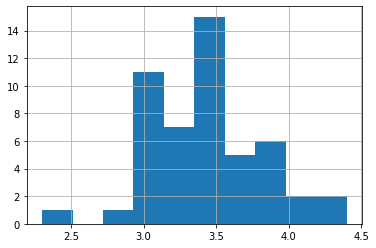

In [202]:
x_rec = s*x_n+m
m_n2 = x_rec.mean()
s_n2 = x_rec.std()
x_rec.hist()
m_n2,s_n2

In [203]:
m_n2 == m

True

In [204]:
s_n2 == s

True

In [226]:
x = df.iloc[:,:4]
y = df.iloc[:,-1]
x = x.reindex(shuffled_index)
y.reindex(shuffled_index)
x.head()

,0,1,2,3
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
132,6.4,2.8,5.6,2.2
34,4.9,3.1,1.5,0.1
125,7.2,3.2,6.0,1.8


In [237]:
y = np.where(y=="Iris-setosa",1,0)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [245]:
prod = (y - np.dot(weights,x.T))

In [251]:
np.dot(prod,x)

array([-452979.68097334, -231872.40865432, -301028.53386268,
        -97218.62040447])

In [260]:
list(zip(prod,x.iloc[:,0]))

[(-554.6431102859151, 6.3),
 (-504.7527367324566, 5.8),
 (-546.7312479213755, 6.4),
 (-434.01245727812403, 4.9),
 (-619.7753731131303, 7.2),
 (-582.1010624537874, 6.7),
 (-611.4737598160941, 7.1),
 (-404.04356497837244, 4.5),
 (-474.0980158771237, 5.6),
 (-387.0721188395579, 4.4),
 (-479.06563626388777, 5.5),
 (-480.5297007887937, 5.6),
 (-379.0970555756922, 4.3),
 (-493.86792850903674, 5.8),
 (-545.6525205480827, 6.3),
 (-460.3073389583711, 5.2),
 (-488.2594092486065, 5.6),
 (-521.4097211579287, 6.0),
 (-441.82965673748413, 5.0),
 (-449.846891558516, 5.1),
 (-580.2490155253661, 6.7),
 (-517.1418996361206, 6.0),
 (-404.1987835309759, 4.6),
 (-523.2316848490119, 6.1),
 (-445.01925351931254, 5.1),
 (-500.8351398378806, 5.9),
 (-480.24217442757464, 5.5),
 (-558.5503873896442, 6.4),
 (-544.357142251842, 6.2),
 (-611.5190792584752, 7.2),
 (-481.37654103409517, 5.5),
 (-508.2912922458488, 5.9),
 (-666.8793684933187, 7.7),
 (-537.6895456040453, 6.3),
 (-445.414294955613, 5.1),
 (-438.46872847